In [241]:
import numpy as np
import pandas as pd

In [242]:
df = pd.read_csv('../data/final_data.csv')

In [243]:
import mobility_entropy as me
from importlib import reload
reload(me)

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate entropies
random_entropy = me.calculate_random_entropy(df)
temporal_uncorrelated_entropy = me.calculate_temporal_uncorrelated_entropy(df)
# actual_entropy = me.calculate_actual_entropy(df)
lempel_ziv_entropy = me.calculate_lempel_ziv_entropy(df)
# calculate number of unique locations for every user
unique_locations = df.groupby('user').pos.nunique()



# Convert to DataFrame for plotting
entropy_df = pd.DataFrame({
    'user': list(random_entropy.keys()),
    'random_entropy': list(random_entropy.values()),
    'temporal_uncorrelated_entropy': list(temporal_uncorrelated_entropy.values()),
    # 'actual_entropy': list(actual_entropy.values()),
    'zempel_ziv_entropy': list(lempel_ziv_entropy),
    'no_unique_locations': list(unique_locations)
})


/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

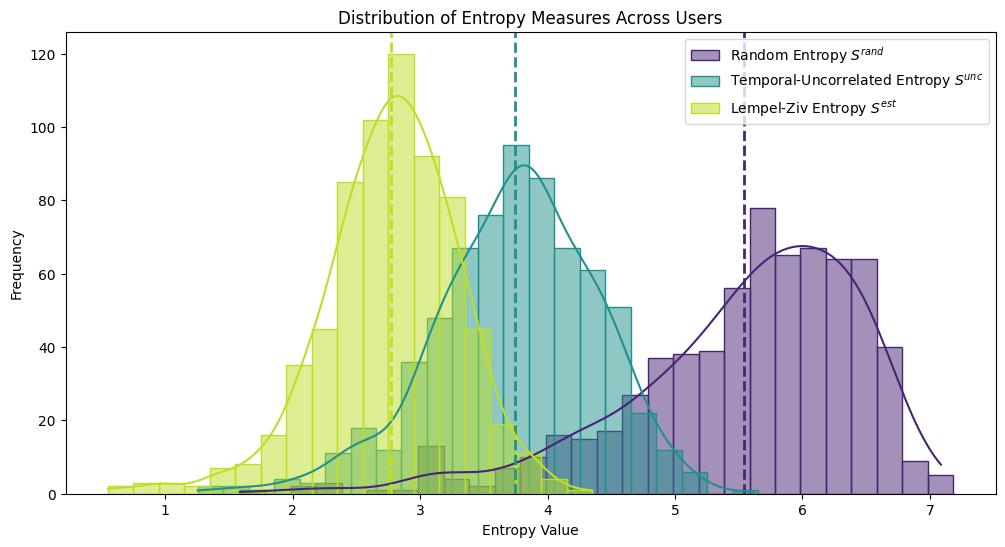

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the 'crest' colormap
crest_cmap = sns.color_palette("viridis", as_cmap=True)

# Define a bin width
bin_width = 0.2  # Adjust this value as needed

# Plotting
plt.figure(figsize=(12, 6))

# Random Entropy
sns.histplot(entropy_df['random_entropy'], color=crest_cmap(0.1), label='Random Entropy $S^{rand}$', kde=True, edgecolor=crest_cmap(0.1), binwidth=bin_width)
plt.axvline(entropy_df['random_entropy'].mean(), color=crest_cmap(0.1), linestyle='dashed', linewidth=2.)

# Temporal-Uncorrelated Entropy
sns.histplot(entropy_df['temporal_uncorrelated_entropy'], color=crest_cmap(0.5), label='Temporal-Uncorrelated Entropy $S^{unc}$', kde=True, edgecolor=crest_cmap(0.5), binwidth=bin_width)
plt.axvline(entropy_df['temporal_uncorrelated_entropy'].mean(), color=crest_cmap(0.5), linestyle='dashed', linewidth=2.)

# Lempel-Ziv Entropy
sns.histplot(entropy_df['zempel_ziv_entropy'], color=crest_cmap(0.9), label='Lempel-Ziv Entropy $S^{est}$', kde=True, edgecolor=crest_cmap(0.9), binwidth=bin_width)
plt.axvline(entropy_df['zempel_ziv_entropy'].mean(), color=crest_cmap(0.9), linestyle='dashed', linewidth=2.)

plt.title('Distribution of Entropy Measures Across Users')
plt.xlabel('Entropy Value')
plt.ylabel('Frequency')
plt.legend()

# Save the figure
plt.savefig('../figures/entropy_distribution.png', dpi=300)

plt.show()


## Upper boundary for predictability 

In [ ]:
# example 
root = me.calculate_predictability(N=20, S_i=2)
root


0.727956983388864

In [ ]:
# calculate predictability for every user based on zempel_ziv_entropy and no_unique_locations
predictability = []
for i in range(len(entropy_df)):
    predictability.append(me.calculate_predictability(N=entropy_df['no_unique_locations'][i], S_i=entropy_df['zempel_ziv_entropy'][i]))
    
    

/data/home/s212588/model/mobility_entropy.py:142: RuntimeWarning: divide by zero encountered in log2
  return -x * np.log2(x) - (1 - x) * np.log2(1 - x) + (1 - x) * np.log2(N - 1) - S_i


In [ ]:
entropy_df['predictability'] = predictability

In [ ]:
entropy_df[entropy_df['predictability'] == 0.0]

,user,random_entropy,temporal_uncorrelated_entropy,zempel_ziv_entropy,no_unique_locations,predictability
112,118.0,2.321928,2.251629,2.215682,5,0.0
115,121.0,2.321928,2.251629,2.215682,5,0.0
198,209.0,2.584963,2.521641,2.456436,6,0.0
298,312.0,0.000000,0.000000,0.000000,1,0.0
524,561.0,2.584963,2.321928,2.372806,6,0.0
528,567.0,2.321928,2.058814,2.037809,5,0.0
544,584.0,1.000000,1.000000,1.090909,2,0.0
571,617.0,2.321928,2.128085,2.183498,5,0.0
646,706.0,2.000000,1.972490,1.692031,4,0.0
650,717.0,2.807355,2.641604,2.593575,7,0.0


/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


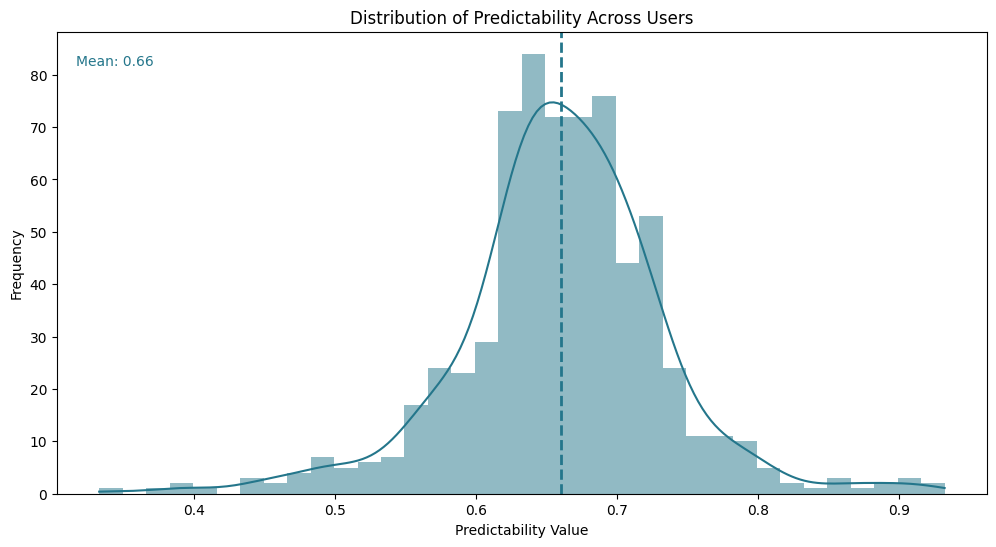

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get a color from the 'crest' colormap
crest_cmap = sns.color_palette("crest", as_cmap=True)
selected_color = crest_cmap(0.6)  # Adjust this value to pick a color

# Plot distribution of predictability
plt.figure(figsize=(12, 6))

sns.histplot(entropy_df['predictability'], color=selected_color, label='Predictability', kde=True, edgecolor =selected_color)

# Add vertical lines for mean
mean_value = entropy_df['predictability'].mean()
plt.axvline(mean_value, color=selected_color, linestyle='dashed', linewidth=2.)

# Add mean value as text at the top of the plot
plt.text(0.02, 0.95, 'Mean: {:.2f}'.format(mean_value), transform=plt.gca().transAxes, color=selected_color, verticalalignment='top')

plt.title('Distribution of Predictability Across Users')
plt.xlabel('Predictability Value')
plt.ylabel('Frequency')

# Save the figure
plt.savefig('../figures/predictability_distribution.png', dpi=300)

plt.show()
